In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
files = [
    "../artifacts/metrics_logistic.json",
    "../artifacts/metrics_decision_tree.json",
    "../artifacts/metrics_random_forest.json",
    "../artifacts/metrics_xgboost.json",
    "../artifacts/metrics_neural_network.json"
]

metrics = []

for file in files:
    with open(file, "r") as f:
        metrics.append(json.load(f))

df = pd.DataFrame(metrics)
df


,model,accuracy,precision,recall,roc_auc
0,Logistic Regression,0.885870,0.871560,0.931373,0.929699
1,Decision Tree,0.815217,0.826923,0.843137,0.877092
2,Random Forest,0.880435,0.870370,0.921569,0.931253
3,XGBoost,0.847826,0.870000,0.852941,0.915710
4,Neural Network (MLP),0.836957,0.839623,0.872549,0.901483


In [3]:
df = df[["model", "accuracy", "precision", "recall", "roc_auc"]]
df


,model,accuracy,precision,recall,roc_auc
0,Logistic Regression,0.885870,0.871560,0.931373,0.929699
1,Decision Tree,0.815217,0.826923,0.843137,0.877092
2,Random Forest,0.880435,0.870370,0.921569,0.931253
3,XGBoost,0.847826,0.870000,0.852941,0.915710
4,Neural Network (MLP),0.836957,0.839623,0.872549,0.901483


In [4]:
df_sorted = df.sort_values(
    by=["recall", "roc_auc"],
    ascending=False
)

df_sorted


,model,accuracy,precision,recall,roc_auc
0,Logistic Regression,0.885870,0.871560,0.931373,0.929699
2,Random Forest,0.880435,0.870370,0.921569,0.931253
4,Neural Network (MLP),0.836957,0.839623,0.872549,0.901483
3,XGBoost,0.847826,0.870000,0.852941,0.915710
1,Decision Tree,0.815217,0.826923,0.843137,0.877092


In [5]:
best_model = df_sorted.iloc[0]
best_model


model        Logistic Regression
accuracy                 0.88587
precision                0.87156
recall                  0.931373
roc_auc                 0.929699
Name: 0, dtype: object

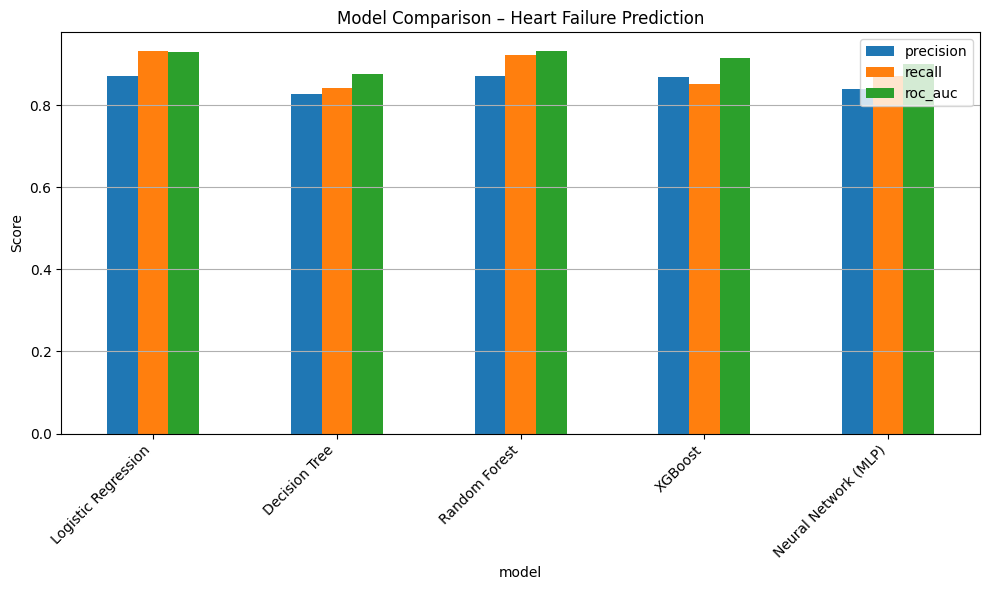

In [6]:
df_plot = df.set_index("model")

df_plot[["precision", "recall", "roc_auc"]].plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Model Comparison – Heart Failure Prediction")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()
